In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
pd.options.display.max_seq_items = 2000

In [3]:
import pickle

In [4]:
path.isfile(r"C:\Users\Joseph\Documents\Beamly\TakeHomeTask\beamly_case_study2.pickle")

True

In [5]:
openfile=open( r"C:\Users\Joseph\Documents\Beamly\TakeHomeTask\beamly_case_study2.pickle", "rb")
df=pickle.load(openfile)
openfile.close()

In [6]:
df.shape

(27091, 13)

In [7]:
df.columns

Index(['date', 'avg_hour', 'min_hour', 'max_hour', 'device_name',
       'productBand', 'avg_price', 'total_products', 'num_orders', 'city',
       'region', 'County', 'Country'],
      dtype='object')

In [8]:
df.sort_values(['date','avg_hour'],ascending=[True,True]).head(20)

,date,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region,County,Country
4212,2018-07-01,0.0,0,0,Tablet,between20and30,29.95,1.0,1,Leeds,Leeds,NaN,NaN
4644,2018-07-01,0.0,0,0,Desktop and Laptop,between20and30,24.95,1.0,1,Oldham,Oldham,NaN,NaN
4946,2018-07-01,0.0,0,0,Tablet,between20and30,23.95,1.0,1,Neath,Neath Port Talbot,NaN,NaN
7077,2018-07-01,0.0,0,0,Desktop and Laptop,between20and30,22.95,1.0,1,Tower Hamlets,Tower Hamlets,NaN,NaN
11286,2018-07-01,0.0,0,0,Desktop and Laptop,between20and30,23.95,1.0,1,Oxford,Oxfordshire,Oxfordshire,England
11334,2018-07-01,0.0,0,0,Desktop and Laptop,lessThan10,3.49,1.0,1,Rotherham,Rotherham,NaN,NaN
11367,2018-07-01,0.0,0,0,Desktop and Laptop,between10and20,19.95,1.0,1,Rotherham,Rotherham,NaN,NaN
13272,2018-07-01,0.0,0,0,Desktop and Laptop,between10and20,15.90,1.0,1,Skelmersdale,Lancashire,Lancashire,England
13891,2018-07-01,0.0,0,0,Mobile,lessThan10,1.50,1.0,1,Wolverton,Milton Keynes,NaN,NaN
13906,2018-07-01,0.0,0,0,Desktop and Laptop,between10and20,17.50,1.0,1,Orpington,Bromley,NaN,NaN


In [9]:
df['device_name'].unique()

array(['Mobile', 'Desktop and Laptop', 'Tablet', 'Unknown'], dtype=object)

In [10]:
df.groupby(['device_name']).count()

,date,avg_hour,min_hour,max_hour,productBand,avg_price,total_products,num_orders,city,region,County,Country
device_name,,,,,,,,,,,,
Desktop and Laptop,7410,7410,7410,7410,7410,7123,7410,7410,7410,7410,2768,2768
Mobile,15440,15440,15440,15440,15440,14675,13449,15440,15440,15440,5824,5824
Tablet,4118,4118,4118,4118,4118,3935,4118,4118,4118,4118,1769,1769
Unknown,123,123,123,123,123,120,123,123,123,123,45,45


In [11]:
df.isnull().any()

date              False
avg_hour          False
min_hour          False
max_hour          False
device_name       False
productBand       False
avg_price          True
total_products     True
num_orders        False
city              False
region            False
County             True
Country            True
dtype: bool

Clearly there are some NaNs in the data, mobile is most dominant dataset.

#### Note on Nans

Nans exist in the following columns and need to be imputed: avg_price, total_products, County, Country


 Start with something 'easy' or not too important. Want to think about how could impute Country/County, so look to see if city or region can help.

### Data Exploration
A bit more exploration of the data before imputing

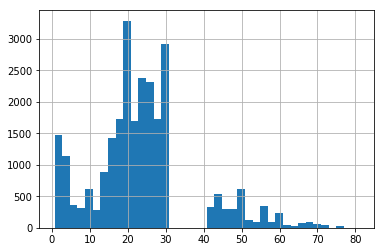

In [12]:
df['avg_price'].hist(bins=40)

Presuming our customers buy products in a normal distribution, we can make a simple estimate to forcast sales for a particular pricing band using just this histogram, although it is a crude estimate.

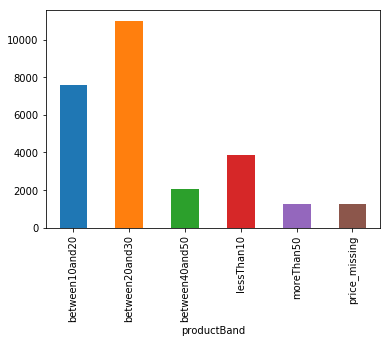

In [13]:
df.groupby(['productBand']).count()['date'].plot.bar()

The exercise says 'One of the brands that we work with has a catalogue of products with different prices, but none of them are within the range between 20 and 30 pounds. This particular brand wants to fill the gap in this price range by releasing a new line.' but I think that it's supposed to be 30-40 that is missing.

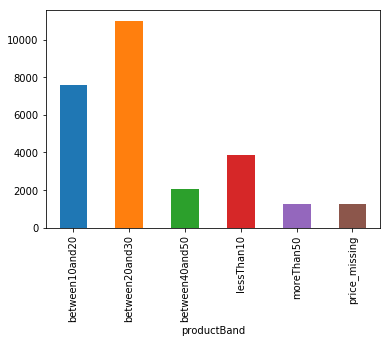

In [14]:
df.groupby(['productBand']).count()['city'].plot.bar()

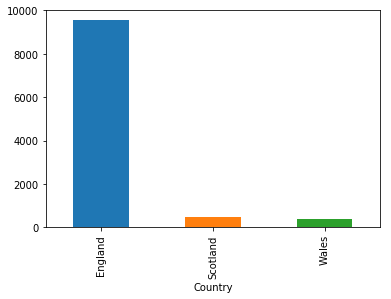

In [15]:
df.groupby(['Country'])['County'].count().plot.bar()

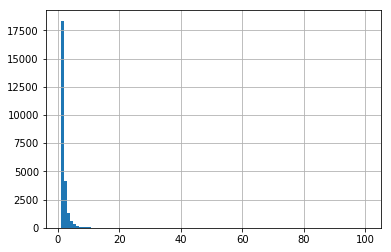

In [16]:
df['total_products'].hist(bins=100)

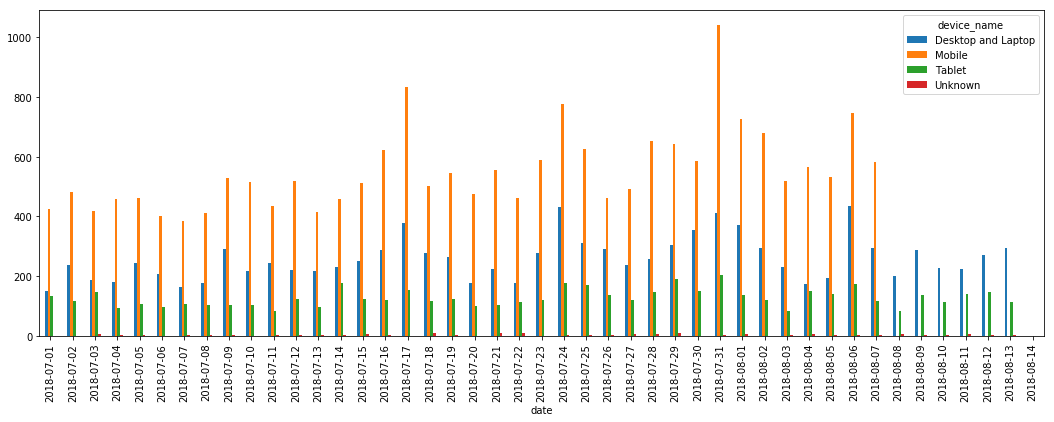

In [17]:
f, ax = plt.subplots(1,figsize=(18,6))

device_date=df.groupby(by=['device_name', 'date']).sum()['total_products'].unstack(0).plot(kind='bar', ax=ax)


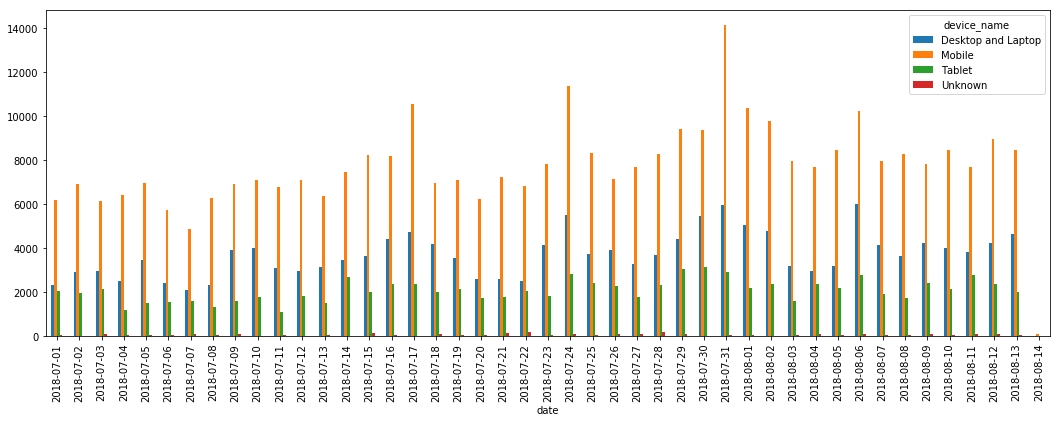

In [19]:
f, ax = plt.subplots(1,figsize=(18,6))

device_date=df.groupby(by=['device_name', 'date']).sum()['avg_price'].unstack(0).plot(kind='bar', ax=ax)

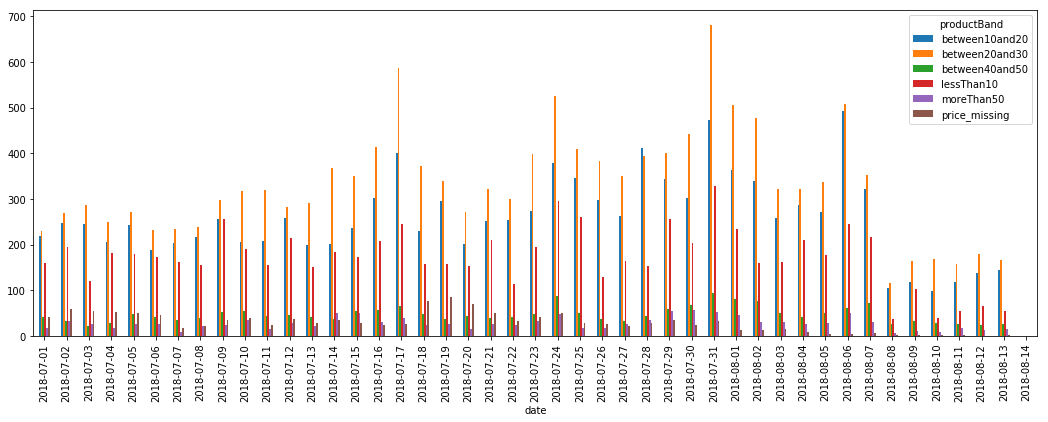

In [18]:
f, ax = plt.subplots(1,figsize=(18,6))

device_date=df.groupby(by=['productBand', 'date']).sum()['total_products'].unstack(0).plot(kind='bar', ax=ax)
